In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline

In [ ]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 3.6 MB/s 
     |████████████████████████████████| 1.1 MB 34.0 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=8e270fdd91d9c52166461d578f90af06ae768dd9be879751267b537f3f091e5b
  Stored in directory: /root/.cache/pip/wheels/a9/3a/67/06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=5b76bc49f96333f7a2af29c9448c2b22303fbce2823d0f98164fe8e034fcefdf
  Stored in directory: /root/.cache/pip/wheels/1c/63/3a/29954bca1a27ba100ed8c27973a78cb71b43dc67aed62e80c3
Successfully built umap-learn pynndescent


In [ ]:
metadata = pd.read_csv('interesting_metadata_for_oligodendroglioma_vs_normal.csv')
metadata.head()

,Unnamed: 0,title,geo_accession,status,submission_date,last_update_date,type,channel_count,source_name_ch1,organism_ch1,...,contact_country,supplementary_file,supplementary_file.1,data_row_count,assay name:ch1,disease:ch1,extract name:ch1,provider:ch1,tissue:ch1,tumor grade:ch1
0,GSM2899558,HF0088,GSM2899558,Public on May 25 2018,Dec 22 2017,May 27 2018,RNA,1,brain,Homo sapiens,...,USA,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2899...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2899...,54613,HF0088_T,normal,HF0088_T,HENRY FORD HOSPITAL (RETRO),brain,NaN
1,GSM2899559,HF0120,GSM2899559,Public on May 25 2018,Dec 22 2017,May 27 2018,RNA,1,brain,Homo sapiens,...,USA,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2899...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2899...,54613,HF0120_T,normal,HF0120_T,HENRY FORD HOSPITAL (RETRO),brain,NaN
2,GSM2899560,HF0131,GSM2899560,Public on May 25 2018,Dec 22 2017,May 27 2018,RNA,1,brain,Homo sapiens,...,USA,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2899...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2899...,54613,HF0131_T,normal,HF0131_T,HENRY FORD HOSPITAL (RETRO),brain,NaN
3,GSM2899561,HF0137,GSM2899561,Public on May 25 2018,Dec 22 2017,May 27 2018,RNA,1,brain,Homo sapiens,...,USA,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2899...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2899...,54613,HF0137_T,normal,HF0137_T,HENRY FORD HOSPITAL (RETRO),brain,NaN
4,GSM2899562,HF0151,GSM2899562,Public on May 25 2018,Dec 22 2017,May 27 2018,RNA,1,brain,Homo sapiens,...,USA,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2899...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2899...,54613,HF0151_T,normal,HF0151_T,HENRY FORD HOSPITAL (RETRO),brain,NaN


In [ ]:
metadata = metadata[["Unnamed: 0", "disease:ch1"]]
metadata

,Unnamed: 0,disease:ch1
0,GSM2899558,normal
1,GSM2899559,normal
2,GSM2899560,normal
3,GSM2899561,normal
4,GSM2899562,normal
...,...,...
90,GSM2899648,oligodendroglioma
91,GSM2899649,oligodendroglioma
92,GSM2899650,oligodendroglioma
93,GSM2899651,oligodendroglioma


In [ ]:
metadata.rename(columns={'Unnamed: 0':'sample_name'}, inplace=True)
metadata = metadata.set_index('sample_name', drop=False).rename_axis(None)
metadata = metadata.iloc[: , 1:]
metadata

,disease:ch1
GSM2899558,normal
GSM2899559,normal
GSM2899560,normal
GSM2899561,normal
GSM2899562,normal
...,...
GSM2899648,oligodendroglioma
GSM2899649,oligodendroglioma
GSM2899650,oligodendroglioma
GSM2899651,oligodendroglioma


In [ ]:
metadata["disease:ch1"].value_counts()

oligodendroglioma    67
normal               28
Name: disease:ch1, dtype: int64

In [ ]:
df = pd.read_csv('interesting_genes_expressions_for_oligodendroglioma_vs_normal.csv')
df

,Unnamed: 0,GSM2899558,GSM2899559,GSM2899560,GSM2899561,GSM2899562,GSM2899563,GSM2899564,GSM2899565,GSM2899566,...,GSM2899643,GSM2899644,GSM2899645,GSM2899646,GSM2899647,GSM2899648,GSM2899649,GSM2899650,GSM2899651,GSM2899652
0,215531_s_at,5.854075,7.100548,6.832461,5.930868,7.877531,7.822425,7.269546,7.791304,8.085796,...,5.066141,6.134969,4.618691,5.219336,4.876189,5.251256,7.494529,4.880413,5.024473,5.023632
1,210408_s_at,9.591090,9.879875,9.040903,9.006577,9.772831,10.158644,9.784682,10.048616,9.844437,...,7.660365,8.587875,8.014352,6.492856,8.682985,6.943209,9.242833,7.141911,6.896400,7.149309
2,1556366_s_at,7.416306,6.745574,5.740382,6.021622,7.775213,7.443440,6.584730,6.417045,6.456328,...,4.477332,5.575732,4.333498,4.394936,4.469566,4.355793,6.625619,4.164190,4.335165,4.419657
3,237509_at,7.991501,8.217580,7.484462,7.647397,8.527501,8.712119,8.473806,7.518319,8.195087,...,5.643521,7.269826,5.954380,5.394017,5.758277,5.399314,7.646456,5.293706,5.415112,5.853775
4,1557107_at,7.615457,7.586958,7.584861,7.703090,7.086702,7.947437,8.198446,7.387522,8.098673,...,5.256542,6.311107,5.074053,5.107948,5.135729,5.069544,7.384735,4.720203,4.534540,5.197429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,206785_s_at,5.854464,5.715651,5.251802,5.176600,7.359161,4.810701,6.057261,5.252749,5.145381,...,5.957770,9.483777,8.952664,4.842154,6.065021,11.379665,5.027911,10.424317,6.537891,10.648372
446,207659_s_at,10.472514,11.672625,11.519297,11.863293,11.587721,10.328704,10.220820,9.273224,9.874872,...,9.209486,11.634934,9.797551,6.785622,11.592750,9.608406,9.736502,8.366931,5.873180,6.162334
447,238021_s_at,4.730412,4.752287,4.671669,4.550286,4.766880,4.642020,4.656391,4.560859,4.188407,...,9.288344,8.342249,8.678641,9.637790,8.954575,5.703903,4.490000,8.981865,6.771521,4.560654
448,201292_at,5.905930,5.924645,6.137562,5.838339,5.714849,5.872437,5.777057,5.895013,6.020121,...,6.346556,11.012038,7.747618,10.691176,9.839370,9.615180,7.280580,10.635034,11.943856,8.151118


In [ ]:
df.rename(columns={'Unnamed: 0':'probe_id'}, inplace=True)
df_transposed = df.T
df_transposed = df_transposed.rename(columns=df_transposed.iloc[0])
df_transposed.drop(index=df_transposed.index[0], 
        axis=0, 
        inplace=True)
df_transposed

,215531_s_at,210408_s_at,1556366_s_at,237509_at,1557107_at,230765_at,220030_at,241672_at,206456_at,219461_at,...,235794_at,231911_at,209631_s_at,1565809_x_at,228679_at,206785_s_at,207659_s_at,238021_s_at,201292_at,230781_at
GSM2899558,5.854075,9.59109,7.416306,7.991501,7.615457,7.999352,8.338394,8.093446,10.283284,9.669458,...,10.413557,10.774956,10.688378,9.668569,7.585587,5.854464,10.472514,4.730412,5.90593,6.711507
GSM2899559,7.100548,9.879875,6.745574,8.21758,7.586958,7.903729,7.983317,7.940645,10.957057,9.443423,...,11.246561,11.758532,11.084463,9.573453,8.12659,5.715651,11.672625,4.752287,5.924645,6.350383
GSM2899560,6.832461,9.040903,5.740382,7.484462,7.584861,7.793586,7.099209,7.74581,9.441001,8.94417,...,10.491792,10.994842,11.120857,8.7291,7.499249,5.251802,11.519297,4.671669,6.137562,6.402295
GSM2899561,5.930868,9.006577,6.021622,7.647397,7.70309,7.877166,7.109108,7.621013,9.692531,9.155996,...,11.36163,11.437765,10.76867,10.066532,7.633644,5.1766,11.863293,4.550286,5.838339,6.302088
GSM2899562,7.877531,9.772831,7.775213,8.527501,7.086702,8.413998,6.776853,8.829609,10.916086,9.767847,...,11.930016,12.570179,12.46523,10.725181,7.952941,7.359161,11.587721,4.76688,5.714849,6.127837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM2899648,5.251256,6.943209,4.355793,5.399314,5.069544,4.825465,4.736425,4.917901,5.078743,7.388513,...,8.425324,8.91591,9.298234,6.599278,8.982749,11.379665,9.608406,5.703903,9.61518,6.513606
GSM2899649,7.494529,9.242833,6.625619,7.646456,7.384735,8.135734,7.249599,8.001412,10.604342,9.760429,...,9.982485,10.406884,10.091578,8.95834,8.816734,5.027911,9.736502,4.49,7.28058,6.67733
GSM2899650,4.880413,7.141911,4.16419,5.293706,4.720203,4.764079,4.491746,4.880897,5.058042,6.767341,...,8.034766,8.493971,9.798897,7.829429,8.709872,10.424317,8.366931,8.981865,10.635034,6.796025
GSM2899651,5.024473,6.8964,4.335165,5.415112,4.53454,4.727873,4.536972,5.194551,5.318082,6.456016,...,6.591316,5.092619,7.621722,4.638873,6.6181,6.537891,5.87318,6.771521,11.943856,6.338007


In [ ]:
frames = [metadata, df_transposed]
df = pd.concat(frames, axis=1)
df

,disease:ch1,215531_s_at,210408_s_at,1556366_s_at,237509_at,1557107_at,230765_at,220030_at,241672_at,206456_at,...,235794_at,231911_at,209631_s_at,1565809_x_at,228679_at,206785_s_at,207659_s_at,238021_s_at,201292_at,230781_at
GSM2899558,normal,5.854075,9.59109,7.416306,7.991501,7.615457,7.999352,8.338394,8.093446,10.283284,...,10.413557,10.774956,10.688378,9.668569,7.585587,5.854464,10.472514,4.730412,5.90593,6.711507
GSM2899559,normal,7.100548,9.879875,6.745574,8.21758,7.586958,7.903729,7.983317,7.940645,10.957057,...,11.246561,11.758532,11.084463,9.573453,8.12659,5.715651,11.672625,4.752287,5.924645,6.350383
GSM2899560,normal,6.832461,9.040903,5.740382,7.484462,7.584861,7.793586,7.099209,7.74581,9.441001,...,10.491792,10.994842,11.120857,8.7291,7.499249,5.251802,11.519297,4.671669,6.137562,6.402295
GSM2899561,normal,5.930868,9.006577,6.021622,7.647397,7.70309,7.877166,7.109108,7.621013,9.692531,...,11.36163,11.437765,10.76867,10.066532,7.633644,5.1766,11.863293,4.550286,5.838339,6.302088
GSM2899562,normal,7.877531,9.772831,7.775213,8.527501,7.086702,8.413998,6.776853,8.829609,10.916086,...,11.930016,12.570179,12.46523,10.725181,7.952941,7.359161,11.587721,4.76688,5.714849,6.127837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM2899648,oligodendroglioma,5.251256,6.943209,4.355793,5.399314,5.069544,4.825465,4.736425,4.917901,5.078743,...,8.425324,8.91591,9.298234,6.599278,8.982749,11.379665,9.608406,5.703903,9.61518,6.513606
GSM2899649,oligodendroglioma,7.494529,9.242833,6.625619,7.646456,7.384735,8.135734,7.249599,8.001412,10.604342,...,9.982485,10.406884,10.091578,8.95834,8.816734,5.027911,9.736502,4.49,7.28058,6.67733
GSM2899650,oligodendroglioma,4.880413,7.141911,4.16419,5.293706,4.720203,4.764079,4.491746,4.880897,5.058042,...,8.034766,8.493971,9.798897,7.829429,8.709872,10.424317,8.366931,8.981865,10.635034,6.796025
GSM2899651,oligodendroglioma,5.024473,6.8964,4.335165,5.415112,4.53454,4.727873,4.536972,5.194551,5.318082,...,6.591316,5.092619,7.621722,4.638873,6.6181,6.537891,5.87318,6.771521,11.943856,6.338007


In [ ]:
df['disease:ch1'] = pd.factorize(df['disease:ch1'])[0]
df

,disease:ch1,215531_s_at,210408_s_at,1556366_s_at,237509_at,1557107_at,230765_at,220030_at,241672_at,206456_at,...,235794_at,231911_at,209631_s_at,1565809_x_at,228679_at,206785_s_at,207659_s_at,238021_s_at,201292_at,230781_at
GSM2899558,0,5.854075,9.59109,7.416306,7.991501,7.615457,7.999352,8.338394,8.093446,10.283284,...,10.413557,10.774956,10.688378,9.668569,7.585587,5.854464,10.472514,4.730412,5.90593,6.711507
GSM2899559,0,7.100548,9.879875,6.745574,8.21758,7.586958,7.903729,7.983317,7.940645,10.957057,...,11.246561,11.758532,11.084463,9.573453,8.12659,5.715651,11.672625,4.752287,5.924645,6.350383
GSM2899560,0,6.832461,9.040903,5.740382,7.484462,7.584861,7.793586,7.099209,7.74581,9.441001,...,10.491792,10.994842,11.120857,8.7291,7.499249,5.251802,11.519297,4.671669,6.137562,6.402295
GSM2899561,0,5.930868,9.006577,6.021622,7.647397,7.70309,7.877166,7.109108,7.621013,9.692531,...,11.36163,11.437765,10.76867,10.066532,7.633644,5.1766,11.863293,4.550286,5.838339,6.302088
GSM2899562,0,7.877531,9.772831,7.775213,8.527501,7.086702,8.413998,6.776853,8.829609,10.916086,...,11.930016,12.570179,12.46523,10.725181,7.952941,7.359161,11.587721,4.76688,5.714849,6.127837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM2899648,1,5.251256,6.943209,4.355793,5.399314,5.069544,4.825465,4.736425,4.917901,5.078743,...,8.425324,8.91591,9.298234,6.599278,8.982749,11.379665,9.608406,5.703903,9.61518,6.513606
GSM2899649,1,7.494529,9.242833,6.625619,7.646456,7.384735,8.135734,7.249599,8.001412,10.604342,...,9.982485,10.406884,10.091578,8.95834,8.816734,5.027911,9.736502,4.49,7.28058,6.67733
GSM2899650,1,4.880413,7.141911,4.16419,5.293706,4.720203,4.764079,4.491746,4.880897,5.058042,...,8.034766,8.493971,9.798897,7.829429,8.709872,10.424317,8.366931,8.981865,10.635034,6.796025
GSM2899651,1,5.024473,6.8964,4.335165,5.415112,4.53454,4.727873,4.536972,5.194551,5.318082,...,6.591316,5.092619,7.621722,4.638873,6.6181,6.537891,5.87318,6.771521,11.943856,6.338007


In [ ]:
for i in range(1, len(df.columns)):
    df.iloc[:,i] = pd.to_numeric(df.iloc[:,i], errors='ignore')
df

,disease:ch1,215531_s_at,210408_s_at,1556366_s_at,237509_at,1557107_at,230765_at,220030_at,241672_at,206456_at,...,235794_at,231911_at,209631_s_at,1565809_x_at,228679_at,206785_s_at,207659_s_at,238021_s_at,201292_at,230781_at
GSM2899558,0,5.854075,9.591090,7.416306,7.991501,7.615457,7.999352,8.338394,8.093446,10.283284,...,10.413557,10.774956,10.688378,9.668569,7.585587,5.854464,10.472514,4.730412,5.905930,6.711507
GSM2899559,0,7.100548,9.879875,6.745574,8.217580,7.586958,7.903729,7.983317,7.940645,10.957057,...,11.246561,11.758532,11.084463,9.573453,8.126590,5.715651,11.672625,4.752287,5.924645,6.350383
GSM2899560,0,6.832461,9.040903,5.740382,7.484462,7.584861,7.793586,7.099209,7.745810,9.441001,...,10.491792,10.994842,11.120857,8.729100,7.499249,5.251802,11.519297,4.671669,6.137562,6.402295
GSM2899561,0,5.930868,9.006577,6.021622,7.647397,7.703090,7.877166,7.109108,7.621013,9.692531,...,11.361630,11.437765,10.768670,10.066532,7.633644,5.176600,11.863293,4.550286,5.838339,6.302088
GSM2899562,0,7.877531,9.772831,7.775213,8.527501,7.086702,8.413998,6.776853,8.829609,10.916086,...,11.930016,12.570179,12.465230,10.725181,7.952941,7.359161,11.587721,4.766880,5.714849,6.127837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM2899648,1,5.251256,6.943209,4.355793,5.399314,5.069544,4.825465,4.736425,4.917901,5.078743,...,8.425324,8.915910,9.298234,6.599278,8.982749,11.379665,9.608406,5.703903,9.615180,6.513606
GSM2899649,1,7.494529,9.242833,6.625619,7.646456,7.384735,8.135734,7.249599,8.001412,10.604342,...,9.982485,10.406884,10.091578,8.958340,8.816734,5.027911,9.736502,4.490000,7.280580,6.677330
GSM2899650,1,4.880413,7.141911,4.164190,5.293706,4.720203,4.764079,4.491746,4.880897,5.058042,...,8.034766,8.493971,9.798897,7.829429,8.709872,10.424317,8.366931,8.981865,10.635034,6.796025
GSM2899651,1,5.024473,6.896400,4.335165,5.415112,4.534540,4.727873,4.536972,5.194551,5.318082,...,6.591316,5.092619,7.621722,4.638873,6.618100,6.537891,5.873180,6.771521,11.943856,6.338007


In [ ]:
df.describe() # Description of statistic features (Sum, Average, Variance, minimum, 1st quartile, 2nd quartile, 3rd Quartile and Maximum)

,disease:ch1,215531_s_at,210408_s_at,1556366_s_at,237509_at,1557107_at,230765_at,220030_at,241672_at,206456_at,...,235794_at,231911_at,209631_s_at,1565809_x_at,228679_at,206785_s_at,207659_s_at,238021_s_at,201292_at,230781_at
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,...,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,0.705263,5.975969,8.102336,5.169225,6.520549,5.955257,6.078069,5.679943,6.258353,7.593670,...,9.130528,9.277126,9.409184,7.434695,9.050144,7.537631,9.095521,6.034433,7.479920,7.861812
std,0.458343,1.349433,1.256307,1.126770,1.219373,1.248456,1.537134,1.296910,1.464574,2.406445,...,1.794351,2.198454,1.917527,2.143770,1.783848,2.440426,2.033608,1.914213,1.948905,2.014911
min,0.000000,4.618691,6.329623,4.142268,5.293706,4.473232,4.587562,4.474018,4.694557,4.842382,...,6.094035,5.092619,5.157547,4.193887,5.576033,4.651023,5.302401,4.188407,5.691633,5.819345
25%,0.000000,4.925731,7.009795,4.380101,5.531494,5.054402,4.818031,4.674205,5.110411,5.317562,...,7.646771,7.582988,7.903678,5.316643,7.593782,5.204957,7.000813,4.587136,5.928411,6.350386
50%,1.000000,5.179759,7.642310,4.481748,5.845557,5.218881,5.108229,4.903860,5.340648,6.517310,...,9.509435,9.771565,9.657752,7.861613,8.557818,6.537891,9.543979,5.073895,6.592543,6.711507
75%,1.000000,7.157556,9.415264,6.026940,7.615982,7.285361,7.653451,6.819652,7.818812,10.362237,...,10.376365,10.843049,10.873829,8.891531,10.994378,9.915395,10.849034,7.295129,8.377410,9.210261
max,1.000000,8.743969,10.645439,7.803230,8.943405,8.530604,9.361499,8.633587,9.276793,11.548141,...,12.380196,12.764288,12.738823,11.004944,12.040735,11.557562,12.425395,10.064167,13.063445,12.968003


In [ ]:
# view the percentage distribution of target_class column

df['disease:ch1'].value_counts()/np.float(len(df))

<ipython-input-13-ea17ae2e22e7>:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df['disease:ch1'].value_counts()/np.float(len(df))


1    0.705263
0    0.294737
Name: disease:ch1, dtype: float64

In [ ]:
# view summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95 entries, GSM2899558 to GSM2899652
Columns: 451 entries, disease:ch1 to 230781_at
dtypes: float64(450), int64(1)
memory usage: 335.5+ KB


In [ ]:
# view summary statistics in numerical variables

round(df.describe(),2)

,disease:ch1,215531_s_at,210408_s_at,1556366_s_at,237509_at,1557107_at,230765_at,220030_at,241672_at,206456_at,...,235794_at,231911_at,209631_s_at,1565809_x_at,228679_at,206785_s_at,207659_s_at,238021_s_at,201292_at,230781_at
count,95.00,95.00,95.00,95.00,95.00,95.00,95.00,95.00,95.00,95.00,...,95.00,95.00,95.00,95.00,95.00,95.00,95.00,95.00,95.00,95.00
mean,0.71,5.98,8.10,5.17,6.52,5.96,6.08,5.68,6.26,7.59,...,9.13,9.28,9.41,7.43,9.05,7.54,9.10,6.03,7.48,7.86
std,0.46,1.35,1.26,1.13,1.22,1.25,1.54,1.30,1.46,2.41,...,1.79,2.20,1.92,2.14,1.78,2.44,2.03,1.91,1.95,2.01
min,0.00,4.62,6.33,4.14,5.29,4.47,4.59,4.47,4.69,4.84,...,6.09,5.09,5.16,4.19,5.58,4.65,5.30,4.19,5.69,5.82
25%,0.00,4.93,7.01,4.38,5.53,5.05,4.82,4.67,5.11,5.32,...,7.65,7.58,7.90,5.32,7.59,5.20,7.00,4.59,5.93,6.35
50%,1.00,5.18,7.64,4.48,5.85,5.22,5.11,4.90,5.34,6.52,...,9.51,9.77,9.66,7.86,8.56,6.54,9.54,5.07,6.59,6.71
75%,1.00,7.16,9.42,6.03,7.62,7.29,7.65,6.82,7.82,10.36,...,10.38,10.84,10.87,8.89,10.99,9.92,10.85,7.30,8.38,9.21
max,1.00,8.74,10.65,7.80,8.94,8.53,9.36,8.63,9.28,11.55,...,12.38,12.76,12.74,11.00,12.04,11.56,12.43,10.06,13.06,12.97


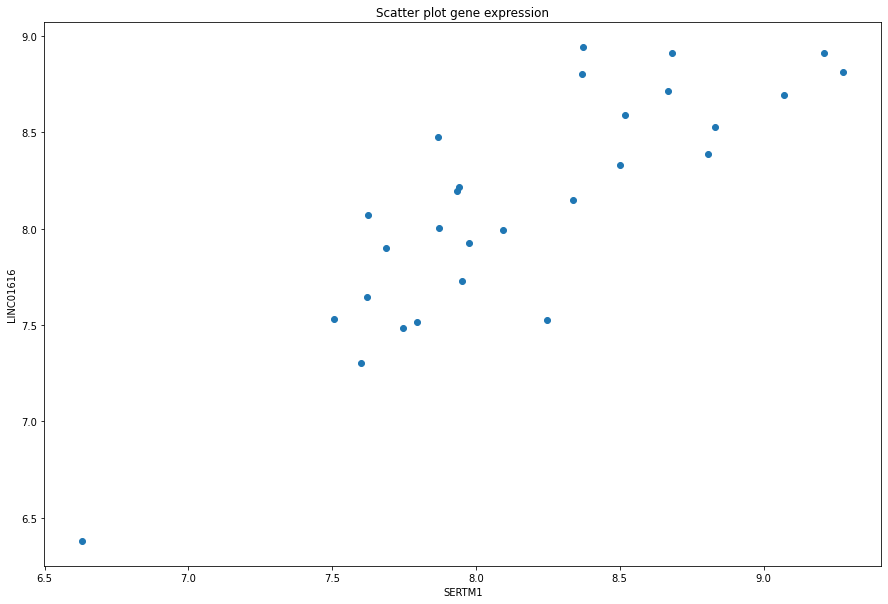

In [ ]:
df_oligodendroglioma = df[df['disease:ch1'] == 0] 
plt.figure(figsize=(15,10))
plt.scatter(df_oligodendroglioma['241672_at'], df_oligodendroglioma['237509_at'])
plt.title('Scatter plot gene expression')
plt.xlabel('SERTM1')
plt.ylabel('LINC01616')
plt.show()

In [ ]:
col_names = df.columns

col_names

Index(['disease:ch1', '215531_s_at', '210408_s_at', '1556366_s_at',
       '237509_at', '1557107_at', '230765_at', '220030_at', '241672_at',
       '206456_at',
       ...
       '235794_at', '231911_at', '209631_s_at', '1565809_x_at', '228679_at',
       '206785_s_at', '207659_s_at', '238021_s_at', '201292_at', '230781_at'],
      dtype='object', length=451)

In [ ]:
# check distribution of target_class column

df['disease:ch1'].value_counts()

1    67
0    28
Name: disease:ch1, dtype: int64

In [ ]:
df.reset_index(inplace=True)
df

,index,disease:ch1,215531_s_at,210408_s_at,1556366_s_at,237509_at,1557107_at,230765_at,220030_at,241672_at,...,235794_at,231911_at,209631_s_at,1565809_x_at,228679_at,206785_s_at,207659_s_at,238021_s_at,201292_at,230781_at
0,GSM2899558,0,5.854075,9.591090,7.416306,7.991501,7.615457,7.999352,8.338394,8.093446,...,10.413557,10.774956,10.688378,9.668569,7.585587,5.854464,10.472514,4.730412,5.905930,6.711507
1,GSM2899559,0,7.100548,9.879875,6.745574,8.217580,7.586958,7.903729,7.983317,7.940645,...,11.246561,11.758532,11.084463,9.573453,8.126590,5.715651,11.672625,4.752287,5.924645,6.350383
2,GSM2899560,0,6.832461,9.040903,5.740382,7.484462,7.584861,7.793586,7.099209,7.745810,...,10.491792,10.994842,11.120857,8.729100,7.499249,5.251802,11.519297,4.671669,6.137562,6.402295
3,GSM2899561,0,5.930868,9.006577,6.021622,7.647397,7.703090,7.877166,7.109108,7.621013,...,11.361630,11.437765,10.768670,10.066532,7.633644,5.176600,11.863293,4.550286,5.838339,6.302088
4,GSM2899562,0,7.877531,9.772831,7.775213,8.527501,7.086702,8.413998,6.776853,8.829609,...,11.930016,12.570179,12.465230,10.725181,7.952941,7.359161,11.587721,4.766880,5.714849,6.127837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,GSM2899648,1,5.251256,6.943209,4.355793,5.399314,5.069544,4.825465,4.736425,4.917901,...,8.425324,8.915910,9.298234,6.599278,8.982749,11.379665,9.608406,5.703903,9.615180,6.513606
91,GSM2899649,1,7.494529,9.242833,6.625619,7.646456,7.384735,8.135734,7.249599,8.001412,...,9.982485,10.406884,10.091578,8.958340,8.816734,5.027911,9.736502,4.490000,7.280580,6.677330
92,GSM2899650,1,4.880413,7.141911,4.164190,5.293706,4.720203,4.764079,4.491746,4.880897,...,8.034766,8.493971,9.798897,7.829429,8.709872,10.424317,8.366931,8.981865,10.635034,6.796025
93,GSM2899651,1,5.024473,6.896400,4.335165,5.415112,4.534540,4.727873,4.536972,5.194551,...,6.591316,5.092619,7.621722,4.638873,6.618100,6.537891,5.873180,6.771521,11.943856,6.338007


In [ ]:
df_corr = df.corr()
df_corr

,disease:ch1,215531_s_at,210408_s_at,1556366_s_at,237509_at,1557107_at,230765_at,220030_at,241672_at,206456_at,...,235794_at,231911_at,209631_s_at,1565809_x_at,228679_at,206785_s_at,207659_s_at,238021_s_at,201292_at,230781_at
disease:ch1,1.000000,-0.864633,-0.863656,-0.858683,-0.858402,-0.851311,-0.848620,-0.848539,-0.847757,-0.846499,...,-0.528031,-0.526054,-0.524234,-0.522704,0.520110,0.514918,-0.512709,0.487899,0.486882,0.475983
215531_s_at,-0.864633,1.000000,0.908825,0.863963,0.908763,0.910751,0.884488,0.879947,0.926569,0.937605,...,0.489633,0.504880,0.507903,0.491352,-0.551452,-0.525323,0.483571,-0.488229,-0.486029,-0.520582
210408_s_at,-0.863656,0.908825,1.000000,0.903899,0.937860,0.934562,0.878123,0.911854,0.920882,0.950701,...,0.668038,0.687552,0.657437,0.677515,-0.527313,-0.577064,0.627752,-0.488518,-0.549537,-0.408880
1556366_s_at,-0.858683,0.863963,0.903899,1.000000,0.945595,0.919550,0.920500,0.936431,0.923849,0.904210,...,0.572537,0.572612,0.564480,0.586739,-0.495044,-0.514994,0.500194,-0.501742,-0.497421,-0.459800
237509_at,-0.858402,0.908763,0.937860,0.945595,1.000000,0.964327,0.928547,0.956727,0.943250,0.943045,...,0.573140,0.581207,0.549936,0.576347,-0.504331,-0.526516,0.522601,-0.516065,-0.538550,-0.474652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206785_s_at,0.514918,-0.525323,-0.577064,-0.514994,-0.526516,-0.579914,-0.553441,-0.528370,-0.559750,-0.540632,...,-0.361713,-0.359526,-0.505923,-0.387626,0.637877,1.000000,-0.375061,0.125891,0.187245,0.337295
207659_s_at,-0.512709,0.483571,0.627752,0.500194,0.522601,0.557427,0.495663,0.523531,0.529661,0.569520,...,0.942352,0.942740,0.846897,0.925493,-0.320341,-0.375061,1.000000,-0.393336,-0.467257,-0.150939
238021_s_at,0.487899,-0.488229,-0.488518,-0.501742,-0.516065,-0.542407,-0.458126,-0.542059,-0.473305,-0.515641,...,-0.425170,-0.412190,-0.281914,-0.332289,-0.107560,0.125891,-0.393336,1.000000,0.756280,0.027389
201292_at,0.486882,-0.486029,-0.549537,-0.497421,-0.538550,-0.572627,-0.431347,-0.537880,-0.524771,-0.547063,...,-0.501741,-0.524881,-0.366430,-0.421963,-0.143793,0.187245,-0.467257,0.756280,1.000000,0.000955


Text(0, 0.5, '241672_at')

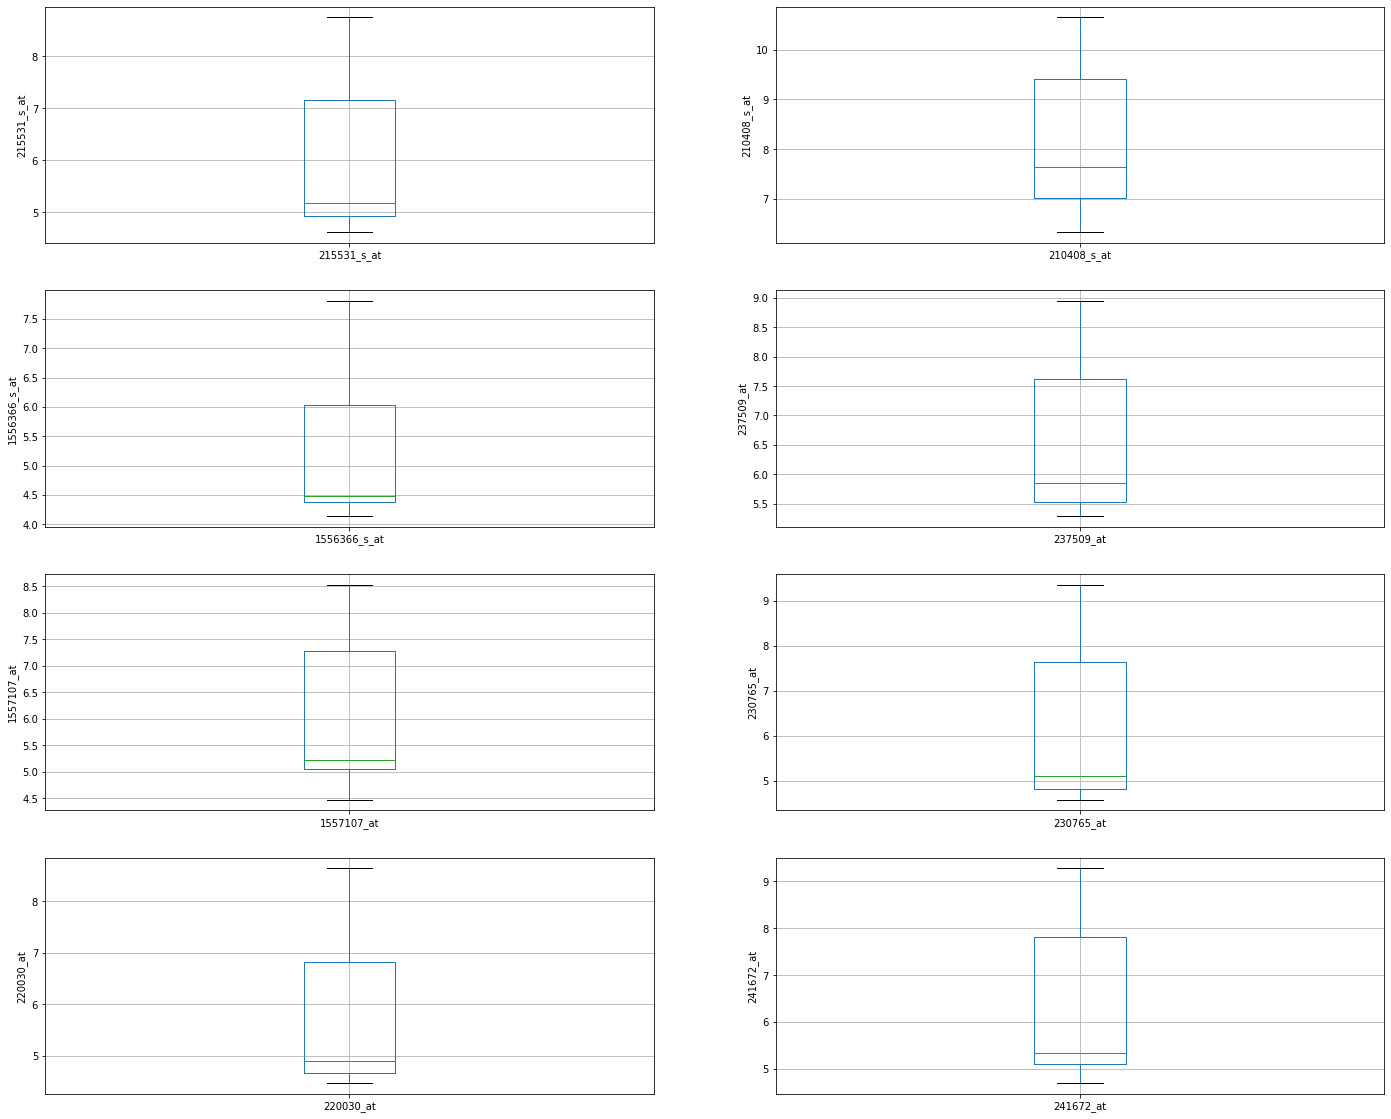

In [ ]:
# draw boxplots to visualize outliers

plt.figure(figsize=(24,20))

plt.subplot(4, 2, 1)
fig = df.boxplot(column='215531_s_at')
fig.set_title('')
fig.set_ylabel('215531_s_at')


plt.subplot(4, 2, 2)
fig = df.boxplot(column='210408_s_at')
fig.set_title('')
fig.set_ylabel('210408_s_at')


plt.subplot(4, 2, 3)
fig = df.boxplot(column='1556366_s_at')
fig.set_title('')
fig.set_ylabel('1556366_s_at')


plt.subplot(4, 2, 4)
fig = df.boxplot(column='237509_at')
fig.set_title('')
fig.set_ylabel('237509_at')


plt.subplot(4, 2, 5)
fig = df.boxplot(column='1557107_at')
fig.set_title('')
fig.set_ylabel('1557107_at')


plt.subplot(4, 2, 6)
fig = df.boxplot(column='230765_at')
fig.set_title('')
fig.set_ylabel('230765_at')


plt.subplot(4, 2, 7)
fig = df.boxplot(column='220030_at')
fig.set_title('')
fig.set_ylabel('220030_at')


plt.subplot(4, 2, 8)
fig = df.boxplot(column='241672_at')
fig.set_title('')
fig.set_ylabel('241672_at')

KeyError: ignored

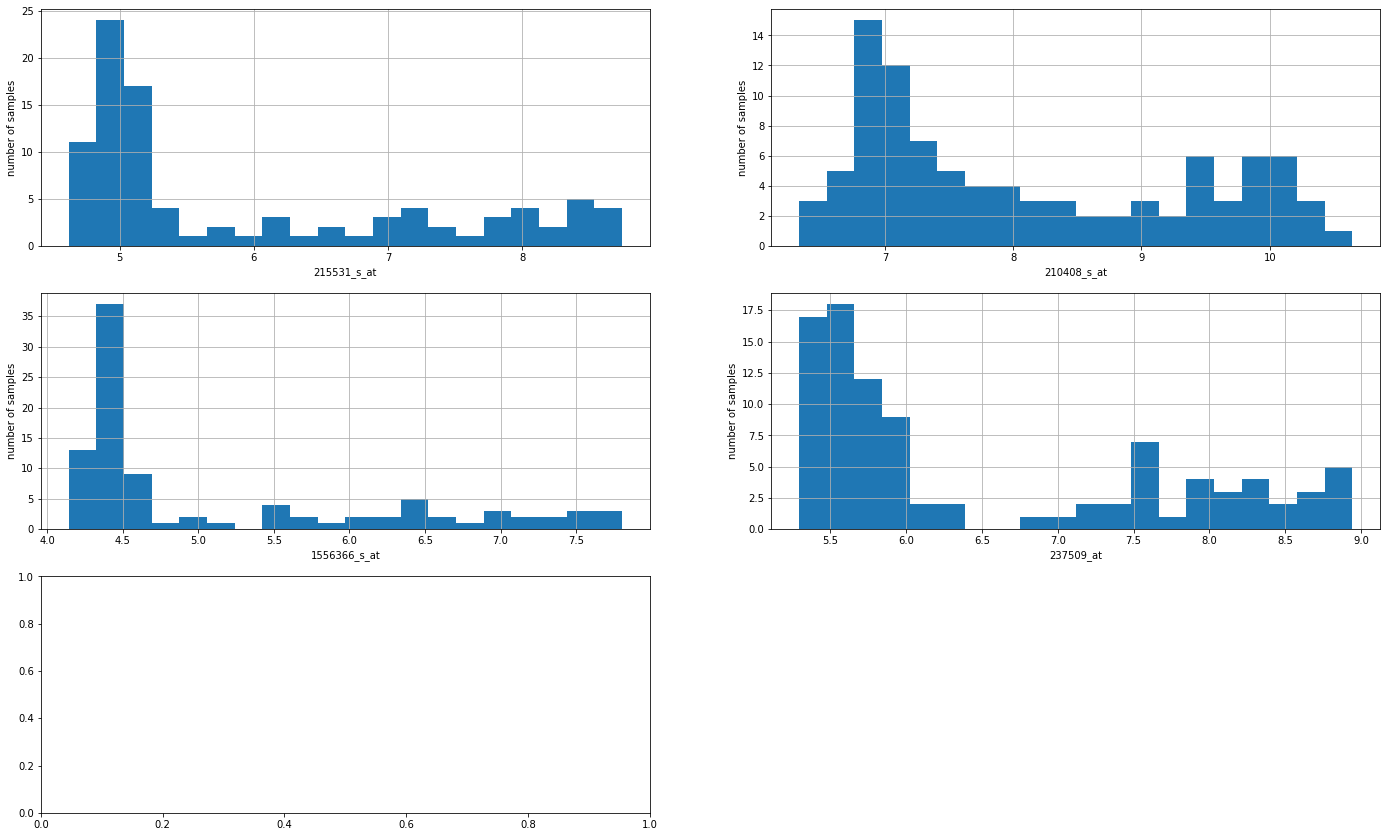

In [ ]:
# plot histogram to check distribution


plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df['215531_s_at'].hist(bins=20)
fig.set_xlabel('215531_s_at')
fig.set_ylabel('number of samples')


plt.subplot(4, 2, 2)
fig = df['210408_s_at'].hist(bins=20)
fig.set_xlabel('210408_s_at')
fig.set_ylabel('number of samples')


plt.subplot(4, 2, 3)
fig = df['1556366_s_at'].hist(bins=20)
fig.set_xlabel('1556366_s_at')
fig.set_ylabel('number of samples')



plt.subplot(4, 2, 4)
fig = df['237509_at'].hist(bins=20)
fig.set_xlabel('237509_at')
fig.set_ylabel('number of samples')



plt.subplot(4, 2, 5)
fig = df['1557107_att'].hist(bins=20)
fig.set_xlabel('1557107_at')
fig.set_ylabel('number of samples')



plt.subplot(4, 2, 6)
fig = df['230765_at'].hist(bins=20)
fig.set_xlabel('230765_at')
fig.set_ylabel('number of samples')



plt.subplot(4, 2, 7)
fig = df['220030_at'].hist(bins=20)
fig.set_xlabel('220030_at')
fig.set_ylabel('number of samples')


plt.subplot(4, 2, 8)
fig = df['241672_at'].hist(bins=20)
fig.set_xlabel('241672_at')
fig.set_ylabel('number of samples')

In [ ]:
X = df.drop(['disease:ch1', 'index'], axis=1)

y = df['disease:ch1']

In [ ]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 0)

In [ ]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((47, 450), (48, 450))

In [ ]:
cols = X_train.columns

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_train.describe()

,215531_s_at,210408_s_at,1556366_s_at,237509_at,1557107_at,230765_at,220030_at,241672_at,206456_at,219461_at,...,235794_at,231911_at,209631_s_at,1565809_x_at,228679_at,206785_s_at,207659_s_at,238021_s_at,201292_at,230781_at
count,4.700000e+01,4.700000e+01,4.700000e+01,4.700000e+01,4.700000e+01,4.700000e+01,4.700000e+01,4.700000e+01,4.700000e+01,4.700000e+01,...,4.700000e+01,4.700000e+01,4.700000e+01,4.700000e+01,4.700000e+01,4.700000e+01,4.700000e+01,4.700000e+01,4.700000e+01,4.700000e+01
mean,-9.684924e-17,3.177128e-16,-3.236182e-16,-6.850312e-17,6.177092e-16,-7.842426e-16,-3.897591e-16,-4.039322e-16,-5.196789e-17,6.850312e-17,...,3.873970e-16,1.748011e-16,6.425120e-16,4.724353e-17,5.515682e-16,-7.594398e-16,-9.590437e-16,7.322748e-16,-2.539340e-16,-1.181088e-15
std,1.010811e+00,1.010811e+00,1.010811e+00,1.010811e+00,1.010811e+00,1.010811e+00,1.010811e+00,1.010811e+00,1.010811e+00,1.010811e+00,...,1.010811e+00,1.010811e+00,1.010811e+00,1.010811e+00,1.010811e+00,1.010811e+00,1.010811e+00,1.010811e+00,1.010811e+00,1.010811e+00
min,-9.401505e-01,-1.354621e+00,-8.988573e-01,-9.848001e-01,-1.135947e+00,-9.537916e-01,-8.771689e-01,-1.064143e+00,-1.028110e+00,-1.139447e+00,...,-1.537230e+00,-1.696351e+00,-1.914139e+00,-1.401304e+00,-2.069202e+00,-1.270952e+00,-1.730102e+00,-9.786909e-01,-8.801467e-01,-9.642048e-01
25%,-7.589747e-01,-8.788581e-01,-6.868220e-01,-7.912340e-01,-7.062265e-01,-8.224565e-01,-7.445800e-01,-7.849786e-01,-9.205513e-01,-8.084555e-01,...,-8.979989e-01,-7.811522e-01,-8.008807e-01,-9.117697e-01,-7.889233e-01,-8.836111e-01,-9.635400e-01,-7.801498e-01,-7.671917e-01,-7.858085e-01
50%,-5.903533e-01,-5.272854e-01,-6.070609e-01,-5.652854e-01,-5.955203e-01,-7.021179e-01,-6.207908e-01,-6.792676e-01,-4.770905e-01,-5.165726e-01,...,2.356908e-01,1.380044e-01,1.201895e-01,7.051586e-02,-3.258681e-01,-4.511109e-01,1.689868e-01,-5.323089e-01,-5.080514e-01,-6.150642e-01
75%,7.593336e-01,1.037777e+00,8.580855e-01,9.769845e-01,1.098249e+00,1.053805e+00,9.950986e-01,1.076002e+00,1.163721e+00,1.116995e+00,...,6.707780e-01,6.987918e-01,7.012057e-01,8.966884e-01,1.143196e+00,1.007475e+00,9.124491e-01,5.888909e-01,5.734131e-01,8.522190e-01
max,2.024031e+00,1.861588e+00,2.365002e+00,1.980677e+00,2.078804e+00,2.117356e+00,2.020394e+00,1.989540e+00,1.621209e+00,1.863380e+00,...,1.798904e+00,1.551380e+00,1.795210e+00,1.684604e+00,1.478658e+00,1.722459e+00,1.636744e+00,2.048542e+00,2.564715e+00,2.244506e+00


In [ ]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [ ]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC() 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9583


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [ ]:
# instantiate classifier with rbf kernel and C=100
svc=SVC(C=100.0) 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.8958


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


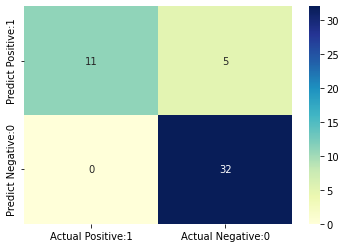

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
# instantiate classifier with rbf kernel and C=1000
svc=SVC(C=1000.0) 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=1000.0 : 0.8958


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
# instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=1.0) 


# fit classifier to training set
linear_svc.fit(X_train,y_train)


# make predictions on test set
y_pred_test=linear_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 0.8958


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
# instantiate classifier with linear kernel and C=100.0
linear_svc100=SVC(kernel='linear', C=100.0) 


# fit classifier to training set
linear_svc100.fit(X_train, y_train)


# make predictions on test set
y_pred=linear_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=100.0 : 0.8958


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


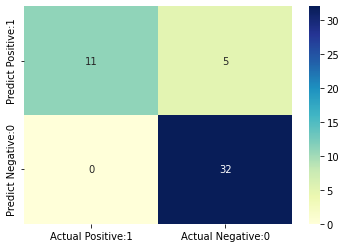

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
# instantiate classifier with linear kernel and C=1000.0
linear_svc1000=SVC(kernel='linear', C=1000.0) 


# fit classifier to training set
linear_svc1000.fit(X_train, y_train)


# make predictions on test set
y_pred=linear_svc1000.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=1000.0 : 0.8958


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
y_pred_train = linear_svc.predict(X_train)

y_pred_train

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


array([1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1])

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 1.0000


In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(linear_svc.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(linear_svc.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.8958


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
# check class distribution in test set

y_test.value_counts()

1    32
0    16
Name: disease:ch1, dtype: int64

In [ ]:
# check null accuracy score

null_accuracy = (31/(31+5))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.8611


In [ ]:
# instantiate classifier with polynomial kernel and C=1.0
poly_svc=SVC(kernel='poly', C=1.0) 


# fit classifier to training set
poly_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=poly_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.9792


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [ ]:
# instantiate classifier with polynomial kernel and C=100.0
poly_svc100=SVC(kernel='poly', C=100.0) 


# fit classifier to training set
poly_svc100.fit(X_train, y_train)


# make predictions on test set
y_pred=poly_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.9167


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


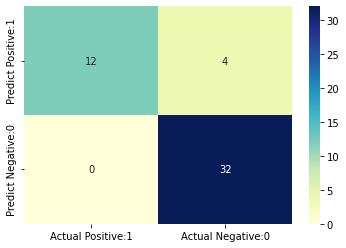

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
# instantiate classifier with sigmoid kernel and C=1.0
sigmoid_svc=SVC(kernel='sigmoid', C=1.0) 


# fit classifier to training set
sigmoid_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=sigmoid_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=1.0 : 0.9583


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
# instantiate classifier with sigmoid kernel and C=100.0
sigmoid_svc100=SVC(kernel='sigmoid', C=100.0) 


# fit classifier to training set
sigmoid_svc100.fit(X_train,y_train)


# make predictions on test set
y_pred=sigmoid_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=100.0 : 0.8542


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


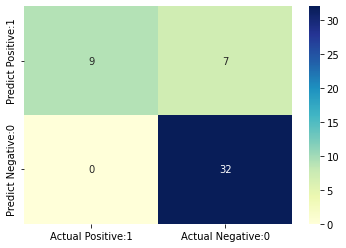

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[11  5]
 [ 0 32]]

True Positives(TP) =  11

True Negatives(TN) =  32

False Positives(FP) =  5

False Negatives(FN) =  0


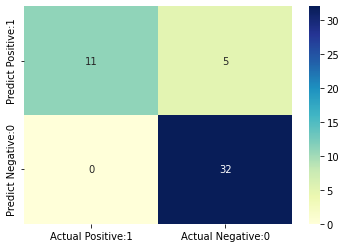

In [ ]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.69      0.81        16
           1       0.86      1.00      0.93        32

    accuracy                           0.90        48
   macro avg       0.93      0.84      0.87        48
weighted avg       0.91      0.90      0.89        48



In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [ ]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8958


In [ ]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1042


In [ ]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.6875


In [ ]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 1.0000


In [ ]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 1.0000


In [ ]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.1351


In [ ]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.8649


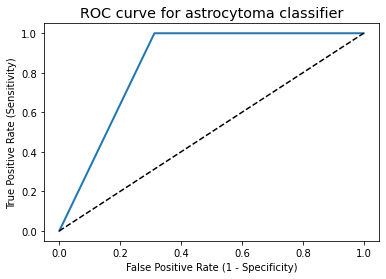

In [ ]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for astrocytoma classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [ ]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred_test)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8438


In [ ]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(linear_svc, X_train, y_train, cv=10, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 1.0000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.

In [ ]:
from sklearn.model_selection import KFold


kfold=KFold(n_splits=5, shuffle=True, random_state=0)


linear_svc=SVC(kernel='linear')


linear_scores = cross_val_score(linear_svc, X, y, cv=kfold)

In [ ]:
# print cross-validation scores with linear kernel

print('Stratified cross-validation scores with linear kernel:\n\n{}'.format(linear_scores))

Stratified cross-validation scores with linear kernel:

[1.         0.84210526 1.         0.94736842 0.94736842]


In [ ]:
# print average cross-validation score with linear kernel

print('Average stratified cross-validation score with linear kernel:{:.4f}'.format(linear_scores.mean()))

Average stratified cross-validation score with linear kernel:0.9474


In [ ]:
rbf_svc=SVC(kernel='rbf')


rbf_scores = cross_val_score(rbf_svc, X, y, cv=kfold)

In [ ]:
# print cross-validation scores with rbf kernel

print('Stratified Cross-validation scores with rbf kernel:\n\n{}'.format(rbf_scores))

Stratified Cross-validation scores with rbf kernel:

[1.         1.         0.89473684 0.89473684 0.89473684]


In [ ]:
# print average cross-validation score with rbf kernel

print('Average stratified cross-validation score with rbf kernel:{:.4f}'.format(rbf_scores.mean()))

Average stratified cross-validation score with rbf kernel:0.9368


In [ ]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV


# import SVC classifier
from sklearn.svm import SVC


# instantiate classifier with default hyperparameters with kernel=rbf, C=1.0 and gamma=auto
svc=SVC() 



# declare parameters for hyperparameter tuning
parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]} 
              ]




grid_search = GridSearchCV(estimator = svc,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'gamma': [0.01, 0.02, 0.03, 0.04, 0.05],
                          'kernel': ['poly']}],
             scoring='accuracy')

In [ ]:
# examine the best model


# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))


# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))


# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.9578


Parameters that give the best results : 

 {'C': 1, 'kernel': 'linear'}


Estimator that was chosen by the search : 

 SVC(C=1, kernel='linear')


In [ ]:
# calculate GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV score on test set: 0.8958


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
